In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

import warnings
warnings.filterwarnings("ignore")

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [2]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 

#dfLE = pd.read_csv("led.csv")       Kept getting File Not Found Error

dfLE = pd.read_csv("../data3450-assignment-2-mlsiebold/data/led.csv")     
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


In [3]:
dfLE.describe()

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
count,191.000000,183.000000,183.000000,191.000000,189.000000,182.000000,191.000000,187.000000,191.000000,191.000000,191.000000,1.910000e+02,1.440000e+02,178.000000
mean,0.167539,69.224932,164.796448,29.133835,4.486793,79.287713,2326.165576,39.117146,40.412631,82.832863,82.628740,4.550119e+10,1.265734e+07,12.027739
std,0.374438,9.186432,96.185159,113.691604,3.873123,17.417697,7924.050116,17.175529,154.310693,15.925330,16.433269,1.305612e+11,3.827961e+07,3.104852
min,0.000000,46.112500,18.750000,0.000000,0.010000,9.000000,0.000000,5.200000,0.000000,29.812500,26.812500,0.000000e+00,2.920000e+02,1.531250
25%,0.000000,62.475000,80.406250,0.000000,1.000000,68.150000,4.781250,20.887500,0.000000,72.000000,72.375000,4.776139e+06,9.623203e+05,9.971875
50%,0.000000,72.487500,146.562500,2.625000,3.582667,83.376068,138.937500,43.843750,3.250000,88.187500,88.500000,2.662176e+09,3.665163e+06,12.359375
75%,0.000000,75.106250,219.593750,21.062500,7.466000,94.687500,1501.593750,52.275000,25.281250,96.062500,96.031250,1.508067e+10,1.034789e+07,14.093750
max,1.000000,82.537500,550.062500,1366.687500,13.497333,99.000000,65857.937500,87.300000,1812.500000,99.000000,99.000000,1.004677e+12,4.214677e+08,20.037500


In [4]:
dfLE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           191 non-null    object 
 1   isDeveloped       191 non-null    float64
 2   Lifeexpectancy    183 non-null    float64
 3   AdultMortality    183 non-null    float64
 4   infantdeaths      191 non-null    float64
 5   Alcohol           189 non-null    float64
 6   HepatitisB        182 non-null    float64
 7   Measles           191 non-null    float64
 8   BMI               187 non-null    float64
 9   under-fivedeaths  191 non-null    float64
 10  Polio             191 non-null    float64
 11  Diphtheria        191 non-null    float64
 12  GDP               191 non-null    float64
 13  Population        144 non-null    float64
 14  Schooling         178 non-null    float64
dtypes: float64(14), object(1)
memory usage: 22.5+ KB


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [5]:
# How many countries have zero or null values in Population and GDP columns?

nullGDP = dfLE[dfLE['GDP'].isnull()]['Country'].count()
nullPop = dfLE[dfLE['Population'].isnull()]['Country'].count()
zeroGDP = dfLE[dfLE['GDP']==0]['Country'].count()    
zeroPop = dfLE[dfLE['Population']==0]['Country'].count()

print(f'GDP is NULL = {nullGDP}\nPopulation is NULL = {nullPop}\nGDP is ZERO = {zeroGDP}\nPopulation is ZERO = {zeroPop}\nRow Count = {dfLE.shape[0]}')

GDP is NULL = 0
Population is NULL = 47
GDP is ZERO = 47
Population is ZERO = 0
Row Count = 191


In [6]:
# Drop rows with null population values

df = dfLE[dfLE['Population'].notnull()]                                                          

In [7]:
# Now how many countries have zero or null values in Population and GDP columns?  Fingers crossed - they should all be zero.

nullGDP2 = df[df['GDP'].isnull()]['Country'].count()
nullPop2 = df[df['Population'].isnull()]['Country'].count()
zeroGDP2 = df[df['GDP']==0]['Country'].count()    
zeroPop2 = df[df['Population']==0]['Country'].count()

print(f'GDP is NULL = {nullGDP2}\nPopulation is NULL = {nullPop2}\nGDP is ZERO = {zeroGDP2}\nPopulation is ZERO = {zeroPop2}\nRow Count = {df.shape[0]} (s/b {(dfLE.shape[0] - nullPop)})')

GDP is NULL = 0
Population is NULL = 0
GDP is ZERO = 0
Population is ZERO = 0
Row Count = 144 (s/b 144)


In [8]:
#Part 1

df['GDPperCapita'] = (df['GDP'] / df['Population']).apply(lambda x: f"{x:,.2f}")          # Calc GDP per capita and format
df[['Country','GDPperCapita']].sample(10)                                                 # Display 10 random rows                  

,Country,GDPperCapita
133,Poland,"4,820.88"
57,Ethiopia,274.14
84,Japan,"26,118.80"
174,Tunisia,"2,942.05"
53,ElSalvador,"3,276.18"
33,Chile,"5,677.91"
21,Botswana,"4,808.27"
111,Montenegro,"4,922.21"
61,Gabon,"5,471.49"
55,Eritrea,180.15


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

In [9]:
col_count = df.select_dtypes(include='float').shape[1]

col_count

14

In [10]:
df

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDPperCapita
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250,414.82
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750,"1,674.44"
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250,"3,392.91"
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375,"2,146.26"
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.3750,92.3750,1.641579e+11,2.012120e+07,16.50625,"8,158.45"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Uruguay,0.0,76.07500,119.9375,0.5625,6.172667,94.312500,0.0000,52.92500,0.7500,94.2500,89.1250,1.750809e+10,2.396771e+06,15.23125,"7,304.87"
184,Uzbekistan,0.0,68.03125,184.8125,21.9375,1.608667,95.642857,208.4375,34.80625,25.6875,98.5625,98.4375,5.006957e+08,9.036317e+05,11.64375,554.09
185,Vanuatu,0.0,71.38750,137.8750,0.0000,0.806667,56.125000,20.8750,44.25625,0.0000,66.1875,59.0625,2.665601e+08,1.230962e+05,10.56875,"2,165.46"
189,Zambia,0.0,53.90625,354.3125,33.4375,2.239333,69.818182,6563.8125,17.45000,52.3750,64.3750,74.2500,4.929321e+09,6.260246e+06,11.21250,787.40


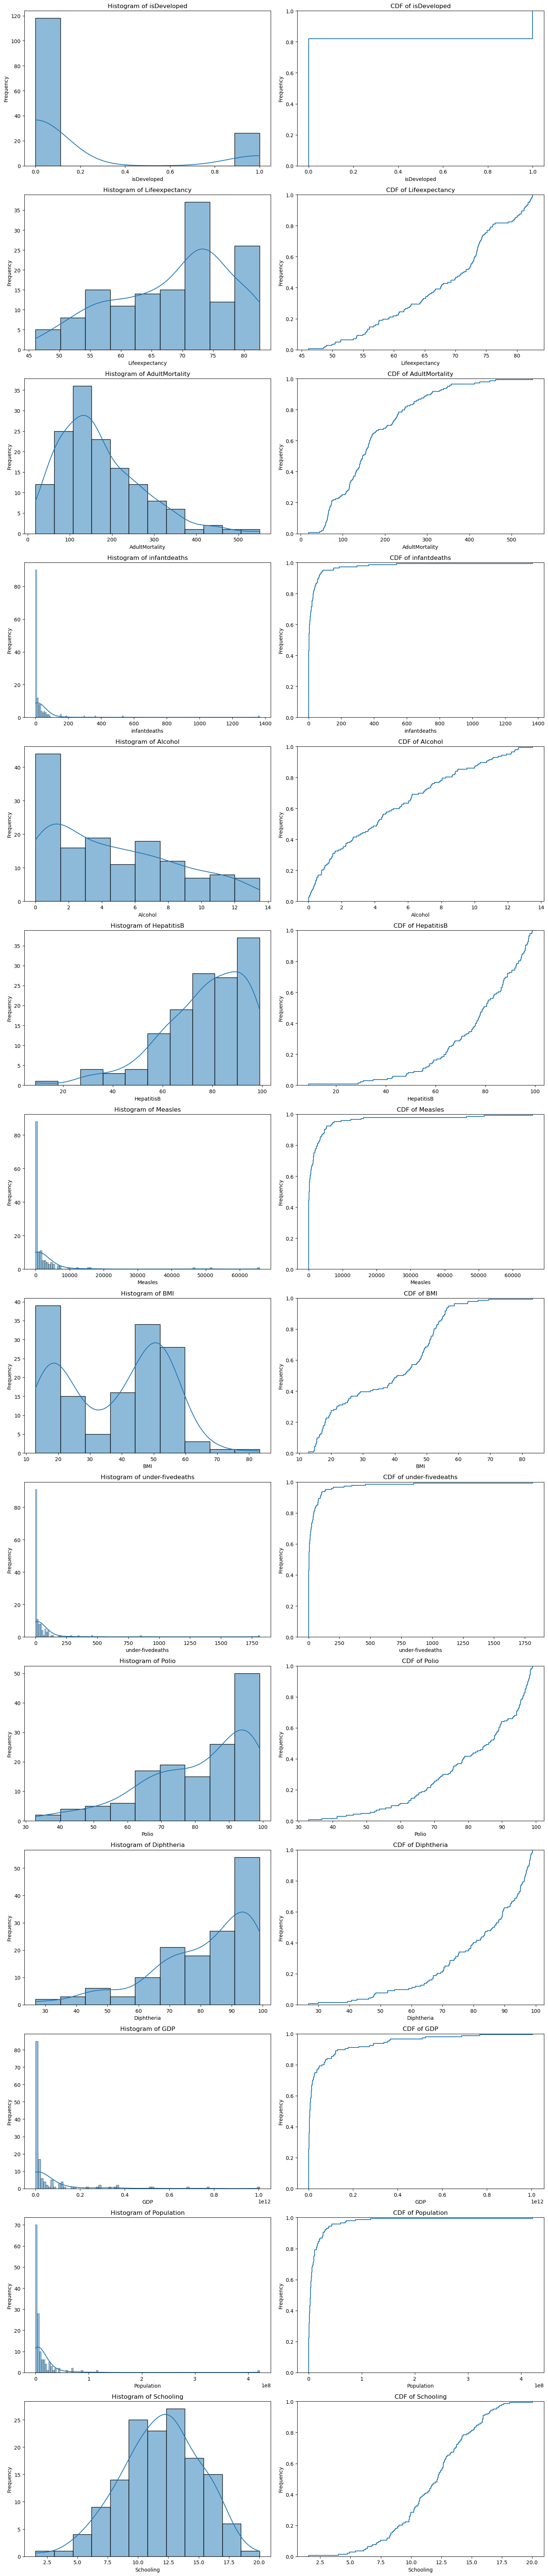

In [ ]:
#Print all distributions

columns = df.select_dtypes(include='float').columns.to_list()                           # Get list of float column names
subplot_rows = len(columns)                                                             # Base number of subplot rows on the number of columns in list
subplot_cols = 2                                                                        # Base number of subplot columns on number of plot types (hist and CDF)

fig, axes = plt.subplots(subplot_rows, subplot_cols, figsize=(15, 5*subplot_rows))      # Create subplots based on number of columns in list
axes = axes.flatten()                                                                   # Convert 2D array to 1D for 

for i, column in enumerate(columns):                                                    # Loop through columns list and enumerate

    sns.histplot(df[column], ax=axes[i*subplot_cols], kde=True)                         # Plot histogram and density curve (KDE)
    axes[i*subplot_cols].set_title(f'Histogram of {column}')                            # axes[i*subplot_cols] tells it where to place the graph:
    axes[i*subplot_cols].set_xlabel(column)                                                 # i = subplot row = current iteration
    axes[i*subplot_cols].set_ylabel('Frequency')                                            # subplot_cols = column number = subplot column 1

    sns.ecdfplot(df[column], ax=axes[i*subplot_cols+1])                                 # Plot CDF
    axes[i*subplot_cols+1].set_title(f'CDF of {column}')                                # axes[i*subplot_cols+1] tells it where to place the graph:
    axes[i*subplot_cols+1].set_xlabel(column)                                               # i = subplot row = current iteration
    axes[i*subplot_cols+1].set_ylabel('Frequency')                                          # subplot_cols+1 = column number = 1+1 = subplot column 2

plt.tight_layout()                                                                      # Tight layout prevents overlapping axis labels
plt.show()

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

In [12]:
#Analytical for Schooling

### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

In [13]:
#Analytical for GDP/capita

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

In [14]:
#Visualize correlations. 

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [15]:
#Calculate correlations and analyze. 